## Week 9 Independent Lab: Inferential Stats
Author: Aerionna Skrutvold  
Course: BGEN632 Grad. Intro to Python  

The purpose for this assignment is to conduct a Linear and Multiple Regression. The program primarily makes use of the [ect_data.txt](/data/ect_data.txt) dataset files contained within the data folder.

## Import Modules 

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression # regression output

## Set Working Directory

In [12]:
os.chdir("C:/Users/gcassist/Desktop/MSBA/Spring 25/Python/week9labs/data")

## Access Data

In [4]:
ect_data = pd.read_csv("ect_data.txt", sep="\t", engine="python", header=0) 

In [5]:
ect_data.info # inspect the data

<bound method DataFrame.info of      attitude1_01  attitude1_02  attitude1_03  attitude1_04  intent1_01  \
0               6             6             6             6           6   
1               7             7             7             7           7   
2               6             6             6             6           7   
3               7             7             7             7           6   
4               7             7             6             6           7   
..            ...           ...           ...           ...         ...   
196             6             6             6             7           7   
197             5             6             6             6           7   
198             6             5             6             6           5   
199             6             6             6             6           6   
200             7             7             6             7           7   

     intent1_02  intent1_03  intent1_04  peruse01  peruse02  peruse

In [6]:
ect_data.columns

Index(['attitude1_01', 'attitude1_02', 'attitude1_03', 'attitude1_04',
       'intent1_01', 'intent1_02', 'intent1_03', 'intent1_04', 'peruse01',
       'peruse02', 'peruse03', 'peruse04', 'satis01', 'satis02', 'satis03',
       'satis04'],
      dtype='object')

In [7]:
ect_data.dtypes # Check data type 

attitude1_01    int64
attitude1_02    int64
attitude1_03    int64
attitude1_04    int64
intent1_01      int64
intent1_02      int64
intent1_03      int64
intent1_04      int64
peruse01        int64
peruse02        int64
peruse03        int64
peruse04        int64
satis01         int64
satis02         int64
satis03         int64
satis04         int64
dtype: object

## Create Linear Regression 

In [27]:
lin_reg = smf.ols('intent1_01 ~ attitude1_03 + attitude1_04 + peruse01 + satis01 + satis02', ect_data).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     34.95
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.96e-25
Time:                        11:26:19   Log-Likelihood:                -224.36
No. Observations:                 201   AIC:                             460.7
Df Residuals:                     195   BIC:                             480.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4957      0.368      4.063      0.000       0.770       2.222
attitude1_03     0.1153      0.100      1.153      0.250      -0.082       0.312
attitude1_04     0.0915      0.104      0.877      0.382      -0.114       0.297
peruse01         0.3364      0.058      5.848      0.000       0.223       0.450
satis01          0.2116      0.100      2.113      0.036       0.014       0.409
satis02          0.0627      0.096      0.652      0.515      -0.127       0.252
==============================================================================
Omnibus:                       49.871   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.297
Skew:                          -0.916   Prob(JB):                     2.89e-42
Kurtosis:                       7.414   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assess Linearity

<Axes: xlabel='attitude1_04', ylabel='intent1_01'>

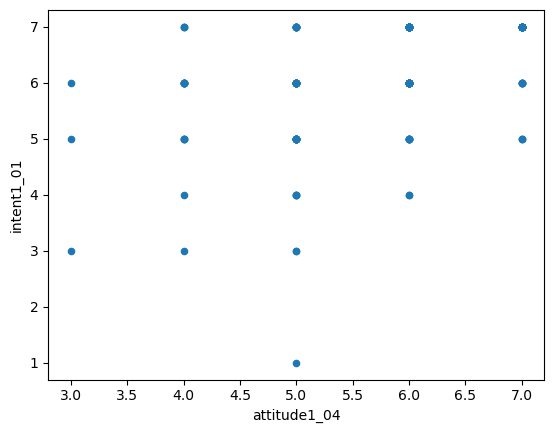

In [20]:
ect_data.plot.scatter(x='attitude1_04', y='intent1_01')

This data does not show consistentcies in the data with being linear. 

<Axes: xlabel='attitude1_03', ylabel='intent1_01'>

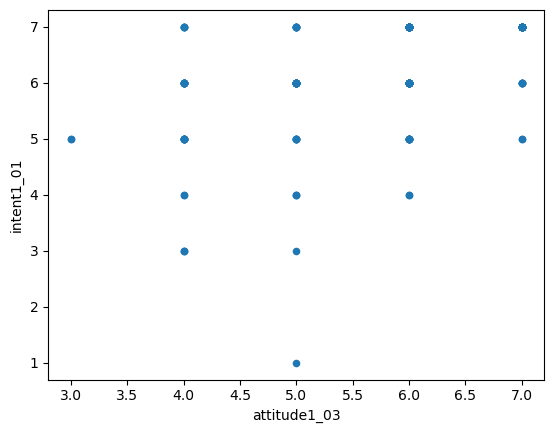

In [21]:
ect_data.plot.scatter(x='attitude1_03', y='intent1_01')

This data does not show consistentcies in the data with being linear. 

<Axes: xlabel='peruse01', ylabel='intent1_01'>

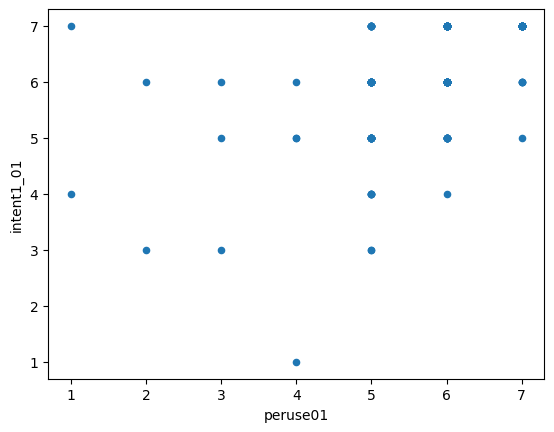

In [22]:
ect_data.plot.scatter(x='peruse01', y='intent1_01')

This data does not show consistentcies in the data with being linear. 

<Axes: xlabel='satis01', ylabel='intent1_01'>

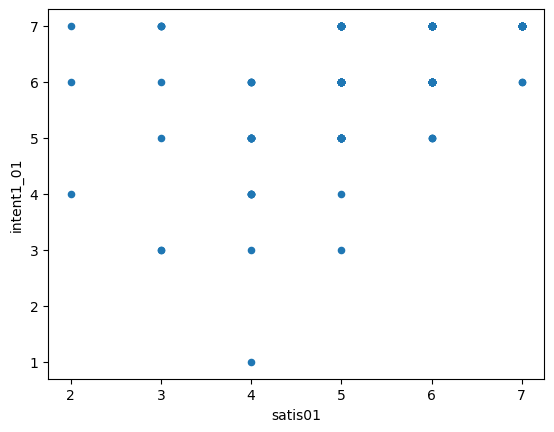

In [23]:
ect_data.plot.scatter(x='satis01', y='intent1_01')

This data does not show consistentcies in the data with being linear. 

<Axes: xlabel='satis02', ylabel='intent1_01'>

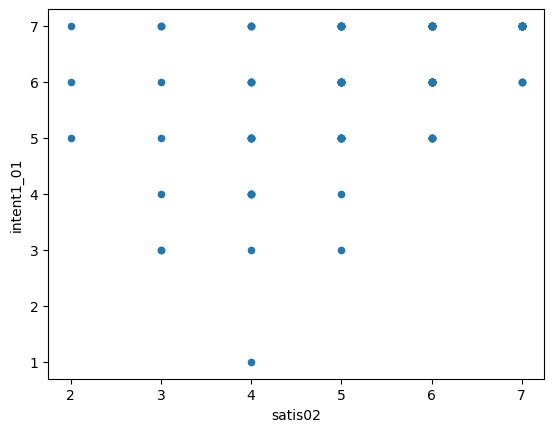

In [24]:
ect_data.plot.scatter(x='satis02', y='intent1_01')

This data does not show consistentcies in the data with being linear. 

## Assess Collinearity

In [28]:
pearsonr(ect_data.attitude1_03, ect_data.intent1_01)

PearsonRResult(statistic=0.519098567478697, pvalue=2.9068684515866345e-15)

The results indicate a moderate positive relationship between intent1_01 and attitude1_03. 

In [29]:
pearsonr(ect_data.attitude1_04, ect_data.intent1_01)

PearsonRResult(statistic=0.5120316317108964, pvalue=7.907993696942252e-15)

The results indicate a moderate positive relationship between intent1_01 and attitude1_04.

In [30]:
pearsonr(ect_data.peruse01, ect_data.intent1_01)

PearsonRResult(statistic=0.5666422098085825, pvalue=1.8194427998723604e-18)

The results indicate a moderate positive relationship between intent1_01 and peruse01.

In [31]:
pearsonr(ect_data.satis01, ect_data.intent1_01)

PearsonRResult(statistic=0.545688440252472, pvalue=5.425059701904438e-17)

The results indicate a moderate positive relationship between intent1_01 and satis01.

In [32]:
pearsonr(ect_data.satis02, ect_data.intent1_01)

PearsonRResult(statistic=0.5005337666384355, pvalue=3.838024308081e-14)

The results indicate a moderate positive relationship between intent1_01 and satis02.

## Assess Homoscedasticity

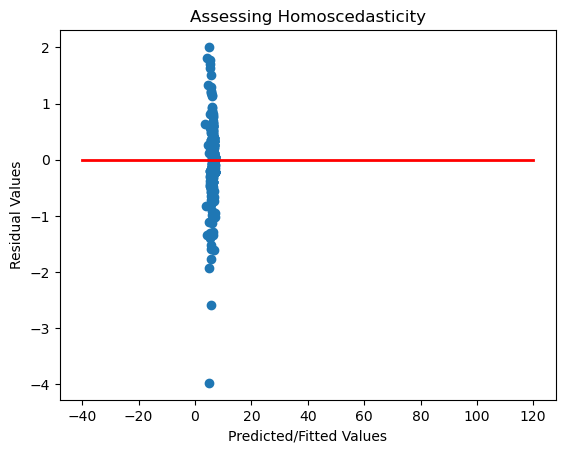

In [17]:
plt.scatter(lin_reg.fittedvalues, lin_reg.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-40, 120],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

## Assess Independence 

In [25]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     34.95
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.96e-25
Time:                        11:16:41   Log-Likelihood:                -224.36
No. Observations:                 201   AIC:                             460.7
Df Residuals:                     195   BIC:                             480.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4957      0.368      4.063      0.000       0.770       2.222
attitude1_03     0.1153      0.100      1.153      0.250      -0.082       0.312
attitude1_04     0.0915      0.104      0.877      0.382      -0.114       0.297
peruse01         0.3364      0.058      5.848      0.000       0.223       0.450
satis01          0.2116      0.100      2.113      0.036       0.014       0.409
satis02          0.0627      0.096      0.652      0.515      -0.127       0.252
==============================================================================
Omnibus:                       49.871   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.297
Skew:                          -0.916   Prob(JB):                     2.89e-42
Kurtosis:                       7.414   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Durbin-Watson test is within the acceptable range of 1.5-2.5 indicating the variables are independent of each other. 

## Assess Normailty

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

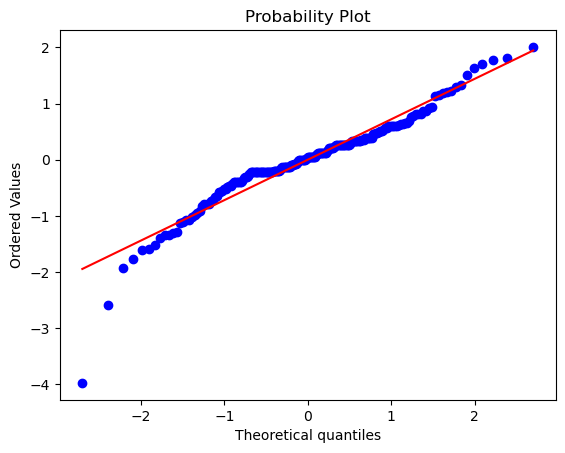

In [26]:
sts.probplot(lin_reg.resid, dist="norm", plot=plt) ## Utlizing a QQ plot 

The points follow the red line fairly closely indicating a normal distribution. 

## Assess model's F-test and T-test

In [33]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     34.95
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.96e-25
Time:                        11:33:52   Log-Likelihood:                -224.36
No. Observations:                 201   AIC:                             460.7
Df Residuals:                     195   BIC:                             480.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4957      0.368      4.063      0.000       0.770       2.222
attitude1_03     0.1153      0.100      1.153      0.250      -0.082       0.312
attitude1_04     0.0915      0.104      0.877      0.382      -0.114       0.297
peruse01         0.3364      0.058      5.848      0.000       0.223       0.450
satis01          0.2116      0.100      2.113      0.036       0.014       0.409
satis02          0.0627      0.096      0.652      0.515      -0.127       0.252
==============================================================================
Omnibus:                       49.871   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.297
Skew:                          -0.916   Prob(JB):                     2.89e-42
Kurtosis:                       7.414   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assess your model's F-test and T-tests. 
The F-Stat is 34.95 with a p-value of 1.96e-25 indicating that at least one of the variables does have a statistically significant relationship with the dependent variable. 

### Which variables are significant? 
Looking at the T-test results and p-values will help us determine which variables are significant. We are looking for a p-value less than 0.05 Based on the P-values of the t-test we can interpret these variables as statistically significant to our regression equation. 
>>> peruse01  
>>> satis01

### Choose two significant variables. From a business perspective, why are they significant?
It's harder to provide an answer to this without the information behind the data explained, for example what each variable specifically is and repreesents. 

### Provide the equation for your model and interpret the results.
intent1_01=1.4957+0.3364(peruse01)+0.2116(satis01)

I chose to only include variables that are statistically significant. The results show a positive relationship between intent1_01 and peruse01 and satis01. Peruse01 seems to have a slightly stronger effect on intent1_01, and theoretically at "0" intent1_01 would equal 1.4957.